In [1]:
!unzip "/content/drive/MyDrive/Dataset.zip"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: Training_Dataset/Normal/
  inflating: Training_Dataset/Normal/1.jpg  
  inflating: Training_Dataset/Normal/10 (2).jpg  
  inflating: Training_Dataset/Normal/10.driving-on-country-roads-1.jpg  
  inflating: Training_Dataset/Normal/10.g2vnvw1of2i11.jpg  
  inflating: Training_Dataset/Normal/10.island-road-trip-smooth-roads-road-trip-sunny-day-sky-having-cumulus-nimbus-clouds-along-empty-smooth-black-124987092.jpg  
  inflating: Training_Dataset/Normal/10.jpg  
  inflating: Training_Dataset/Normal/10.This-Is-the-Real-Difference-Between-Streets-Roads-and-Avenues_394392439-TTstudio-1024x684.jpg  
  inflating: Training_Dataset/Normal/100.5b23afff15e9f96fe6738e67.jpg  
  inflating: Training_Dataset/Normal/100.jpg  
  inflating: Training_Dataset/Normal/101.1946---N,-d-,09,-d-,93,-d-,04,-d-,04-driving.jpg  
  inflating: Training_Dataset/Normal/101.jpg  
  inflating: Training_Dataset/Normal/102.jpg  
  inflating: Training_Dataset/Normal/1

In [40]:
import tensorflow #keras-deep learning library library built on top of tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation #dense layer is fully connected layer.
#Dropout is to prevent your model from overfitting.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

In [3]:
#initializing the parameters
image_width,image_height=200,200  #height and width of acceptable images to the model
training_data_dir=r"/content/Training_Dataset"

testing_data_dir=r"/content/Testing_Dataset"
epochs=70 #70 times the model will learn from the data.
batch_size=20  #takes 20 samples from the dataset

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channels_first":
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)

In [5]:
trained_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale=1./255, #rescaling the pixels in range 0-255 to 0-1.
                                 shear_range=0.2, #applies 20% shear strain over image .
                                 zoom_range=0.3, #adjust the zoom in the range of 1-0.3 to 1+0.3.
                                 horizontal_flip=True,vertical_flip=True, #flips the image vertically and horizontally.
                                 rotation_range=360, #rotates the image in range of 0 to 360.
                                 fill_mode='nearest', #after rotating, if the image has whitespaces created then they are filled with the nearest pixels.
                                 width_shift_range=0.2,height_shift_range=0.2, #shifts the image by 20% in horizontal and vertical directions.
                                 brightness_range=[0.4,1.5] #this are the brightness shift values range
                                 )

tested_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255, brightness_range=[0.4,1.5])
trained_generator=trained_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                  classes=["Normal","Potholes","SpeedBumps"])

validated_generator=tested_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                      classes=["Normal","Potholes","SpeedBumps"])

Found 1703 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [41]:
model_i3=DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
)
model_i3.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 206, 206, 3)          0         ['input_4[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 100, 100, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [42]:
model_i3.trainable=True
set_trainable=False

for layer in model_i3.layers:
  if layer.name=='conv5_block5_2_conv':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in model_i3.layers:
  print(layer.name,layer.trainable)

input_4 False
zero_padding2d False
conv1/conv False
conv1/bn False
conv1/relu False
zero_padding2d_1 False
pool1 False
conv2_block1_0_bn False
conv2_block1_0_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_concat False
conv2_block2_0_bn False
conv2_block2_0_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_concat False
conv2_block3_0_bn False
conv2_block3_0_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_concat False
conv2_block4_0_bn False
conv2_block4_0_relu False
conv2_block4_1_conv False
conv2_block4_1_bn False
conv2_block4_1_relu False
conv2_block4_2_conv False
conv2_block4_concat False
conv2_block5_0_bn False
conv2_block5_0_relu False
conv2_block5_1_conv False
conv2_block5_1_bn False
conv2_block5_1_relu False
conv2_block5_2_conv False
conv2_block5_conc

In [43]:
# for layers in models1.layers:
#   layers.trainable=False

model_i3.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 206, 206, 3)          0         ['input_4[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 100, 100, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1/conv[0][0]']

In [44]:
#making classification layer to fit our model
from matplotlib.cbook import flatten
from tensorflow.keras import layers, models

flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation='relu')

dense_layer2=layers.Dense(20,activation='relu')

predictionlayer=layers.Dense(3,activation='softmax')

model_i21=models.Sequential([model_i3,
                         flatten_layer,
                         dense_layer1,
                        Dropout(0.2),
                         dense_layer2,
                         Dropout(0.2),
                         predictionlayer]) #dropout after each dense layer deactivates the 20% nodes of the above layer randomly in each epoch.
model_i21.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 36864)             0         
                                                                 
 dense_15 (Dense)            (None, 50)                1843250   
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 20)                1020      
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                

In [45]:
from keras.optimizers import SGD


model_i21.compile(
    optimizer='SGD', loss='categorical_crossentropy',metrics='accuracy'
)

In [11]:
from keras.callbacks import ReduceLROnPlateau
reduced_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=0.0001)
callback_list=[reduced_lr]

In [46]:
traineed=model_i21.fit(trained_generator,steps_per_epoch=50,epochs=50, validation_data=validated_generator,shuffle=True, callbacks=callback_list)

Epoch 1/50
39/50 [======================>.......] - ETA: 4s - loss: 1.2040 - accuracy: 0.5090

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 44s 609ms/step - loss: 1.1042 - accuracy: 0.5310 - val_loss: 0.7228 - val_accuracy: 0.6045 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 29s 583ms/step - loss: 0.6862 - accuracy: 0.6870 - val_loss: 0.4430 - val_accuracy: 0.9023 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 33s 670ms/step - loss: 0.5933 - accuracy: 0.7650 - val_loss: 0.4547 - val_accuracy: 0.8273 - lr: 0.0100
Epoch 4/50
50/50 [==============================] - 28s 563ms/step - loss: 0.4374 - accuracy: 0.8383 - val_loss: 0.3910 - val_accuracy: 0.8795 - lr: 0.0100
Epoch 5/50
50/50 [==============================] - 29s 574ms/step - loss: 0.3707 - accuracy: 0.8678 - val_loss: 0.2124 - val_accuracy: 0.9386 - lr: 0.0100
Epoch 6/50
50/50 [==============================] - 29s 575ms/step - loss: 0.3646 - accuracy: 0.8566 - val_loss: 0.1600 - val_accuracy: 0.9523 - lr: 0.0100
Epoch 7/50
50/50 [==============================] - 29s 580ms/step - loss: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


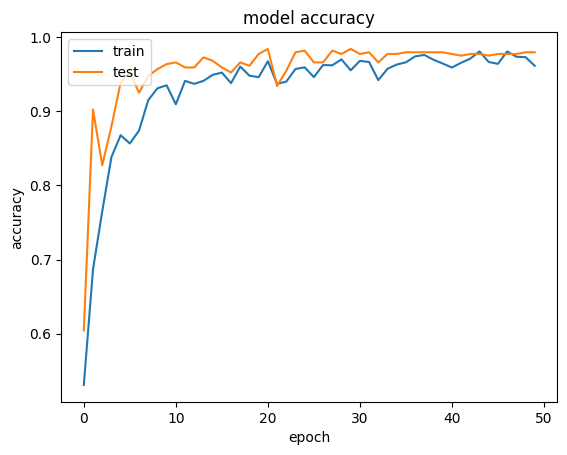

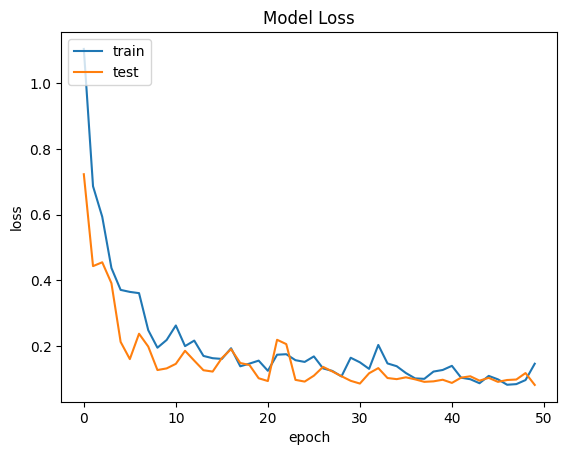

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(traineed.history.keys())
#summarize training for accuracy
plt.plot(traineed.history['accuracy'])
plt.plot(traineed.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()
#summarize training for loss
plt.plot(traineed.history['loss'])
plt.plot(traineed.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()